### Intro

A near-Earth object (NEO) is any small solar system object, such as asteroids or comets, that orbits the Sun and whose closest distance to the Sun is less than 1.3 times the Earth-to-Sun distance (measured in Astronomical units, AU).
When the orbits of Near-Earth Objects (NEOs) intersect with Earth's orbit, they pose a potential collision threat. NEOs with an estimated diameter of over 140 meters are classified as Potentially Hazardous Objects (PHOs). Most PHOs are asteroids, referred to as Potentially Hazardous Asteroids (PHAs). These asteroids are identified based on two key parameters: (a) their potential to approach Earth at a dangerously close distance, and (b) the significant impact consequences they could cause in the event of a collision.



### Problem statement


Asteroid **2024 YR24**, discovered on **December 22, 2024**, by the **ATLAS telescope** in **Río Hurtado, Chile**, initially raised concerns due to its estimated **40–90m size** and potential impact risk. However, recent observations have ruled out nearly all hazardous trajectories. It has now dropped from **Level 3 to Level 0** on the **Torino Impact Hazard Scale**, no longer posing a significant threat. This follows a common pattern where initial impact probabilities rise before rapidly falling as orbital uncertainties are refined. 

Despite existing detection methods, accurately differentiating PHAs from non-hazardous NEOs remains a challenge due to the large volume of astronomical data and the dynamic nature of NEO orbits. This project aims to develop a binary classification model to address the following:


* 	Classify NEOs into two categories: PHOs and non-PHOs.


* 	Utilize orbital parameters, size, distance, and magnitude to enhance classification accuracy.

In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

from collections import Counter

In [16]:
train_set = pd.read_csv("C:\\Users\\DELL\\Desktop\\Hazardous NEOs\\data\\processed\\train_set_neos.csv")
test_set = pd.read_csv("C:\\Users\\DELL\\Desktop\\Hazardous NEOs\\data\\processed\\test_set_neos.csv")

train_set

,absolute_magnitude,estimated_diameter_max,relative_velocity,miss_distance,velocity_to_diameter_ratio,phos
0,26.54,0.029244,55097.431710,0.258957,0.421285,0
1,25.45,0.048310,16157.520299,7.243133,0.074786,0
2,27.10,0.022596,41947.421003,3.359214,0.415098,0
3,21.70,0.271669,84202.217885,7.197087,0.069306,0
4,27.81,0.016294,27525.124188,3.476073,0.377724,0
...,...,...,...,...,...,...
241235,25.82,0.040742,49533.997459,3.161270,0.271862,0
241236,22.10,0.225964,59457.667968,3.907463,0.058837,0
241237,26.45,0.030482,70706.864749,7.463299,0.518688,0
241238,25.40,0.049436,19887.811615,1.838817,0.089956,0


In [17]:
train_set["phos"].value_counts()/len(train_set["phos"])

phos
0    0.878664
1    0.121336
Name: count, dtype: float64

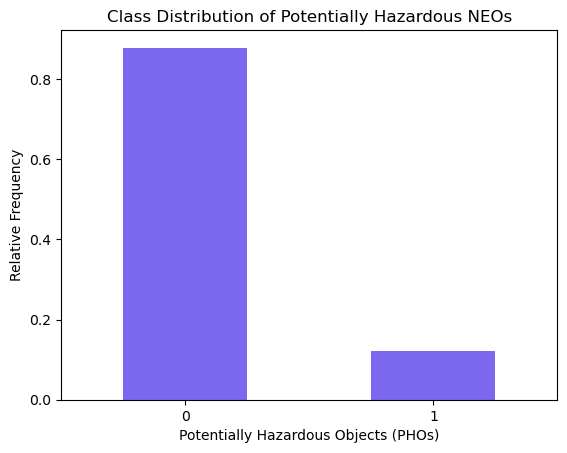

In [18]:
train_set["phos"].value_counts(normalize=True).plot(
    kind="bar",
    xlabel="Potentially Hazardous Objects (PHOs)", 
    ylabel="Relative Frequency",
    title="Class Distribution of Potentially Hazardous NEOs",
    color="mediumslateblue"
)
plt.xticks(rotation=0) 
plt.show()

In [19]:
X_train = train_set.drop(columns=train_set.columns[-1], axis=1)
y_train = train_set['phos']

X_test = test_set.drop(columns=test_set.columns[-1], axis=1)
y_test = test_set['phos']

In [20]:
X_train

,absolute_magnitude,estimated_diameter_max,relative_velocity,miss_distance,velocity_to_diameter_ratio
0,26.54,0.029244,55097.431710,0.258957,0.421285
1,25.45,0.048310,16157.520299,7.243133,0.074786
2,27.10,0.022596,41947.421003,3.359214,0.415098
3,21.70,0.271669,84202.217885,7.197087,0.069306
4,27.81,0.016294,27525.124188,3.476073,0.377724
...,...,...,...,...,...
241235,25.82,0.040742,49533.997459,3.161270,0.271862
241236,22.10,0.225964,59457.667968,3.907463,0.058837
241237,26.45,0.030482,70706.864749,7.463299,0.518688
241238,25.40,0.049436,19887.811615,1.838817,0.089956


In [21]:
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

### A) SMOTE Technique

In [22]:
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 211969, 1: 29271})
After Counter({0: 211969, 1: 211969})


### B) ADASYN Technique

In [23]:
from imblearn.over_sampling import ADASYN

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)


Before Counter({0: 211969, 1: 29271})
After Counter({1: 213814, 0: 211969})


## C) Hybrid Techniques

### C.1) SMOTE + Tomek Links

In [24]:
from imblearn.combine import SMOTETomek

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({0: 211969, 1: 29271})
After Counter({0: 208627, 1: 208627})


### C.2) SMOTE + ENN

In [25]:
from imblearn.combine import SMOTEENN

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
X_train_smenn, y_train_smenn = smenn.fit_resample(X_train, y_train)

counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({0: 211969, 1: 29271})
After Counter({1: 192260, 0: 172819})


# Model Building - Imbalanced data

In [26]:
model = list()
resample = list()
precision = list()
recall = list()
F1score = list()
AUCROC = list()

In [27]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
          
    model.append(algo)
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    AUCROC.append(roc_auc_score(y_test, y_prob[:,1]))
    resample.append(sampling)

## Model-1: Logistic Regression

### 1. `Original Unsampled Data`

In [28]:

# Define model
log_model = LogisticRegression(solver='saga', max_iter=5000)

# Define hyperparameter search space
params = {
    'C': np.logspace(-4, 2, 20),  # More granular search
    'class_weight': [None, 'balanced'],
    'penalty': ['l1', 'l2']
}

# Stratified K-Fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True)

# Perform RandomizedSearchCV
clf_LR = RandomizedSearchCV(
    log_model, 
    params, 
    cv=cv, 
    scoring='roc_auc', 
    n_jobs=-1, 
    n_iter=10,  # Number of random samples to try
    verbose=1, 
    random_state=42
)

# Fit model
clf_LR.fit(X_train, y_train)

# Print best parameters
print("Best Logistic Regression Model:", clf_LR.best_estimator_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Logistic Regression Model: LogisticRegression(C=0.01623776739188721, max_iter=5000, penalty='l1',
                   solver='saga')


In [29]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'actual')

Confusion Matrix
[[52223   681]
 [ 6742   665]] 

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.99      0.93     52904
           1       0.49      0.09      0.15      7407

    accuracy                           0.88     60311
   macro avg       0.69      0.54      0.54     60311
weighted avg       0.84      0.88      0.84     60311
 

AUC-ROC
0.861332261562606


### `2.SMOTE Resampling`

In [30]:
clf_LR.fit(X_train_sm, y_train_sm)
clf_LR.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


LogisticRegression(C=0.01623776739188721, class_weight='balanced',
                   max_iter=5000, solver='saga')

In [31]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'smote')

Confusion Matrix
[[37966 14938]
 [  680  6727]] 

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.72      0.83     52904
           1       0.31      0.91      0.46      7407

    accuracy                           0.74     60311
   macro avg       0.65      0.81      0.65     60311
weighted avg       0.90      0.74      0.78     60311
 

AUC-ROC
0.8578419633660526


In [32]:
clf_LR.fit(X_train_ada, y_train_ada)
clf_LR.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


LogisticRegression(C=23.357214690901213, class_weight='balanced', max_iter=5000,
                   penalty='l1', solver='saga')

In [33]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'adasyn')

Confusion Matrix
[[37773 15131]
 [  533  6874]] 

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.71      0.83     52904
           1       0.31      0.93      0.47      7407

    accuracy                           0.74     60311
   macro avg       0.65      0.82      0.65     60311
weighted avg       0.90      0.74      0.78     60311
 

AUC-ROC
0.852059302680217


In [34]:
clf_LR.fit(X_train_smtom, y_train_smtom)
clf_LR.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


LogisticRegression(C=0.01623776739188721, class_weight='balanced',
                   max_iter=5000, solver='saga')

In [35]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'smote+tomek')

Confusion Matrix
[[37908 14996]
 [  654  6753]] 

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.72      0.83     52904
           1       0.31      0.91      0.46      7407

    accuracy                           0.74     60311
   macro avg       0.65      0.81      0.65     60311
weighted avg       0.90      0.74      0.78     60311
 

AUC-ROC
0.8578566854633831


In [36]:
clf_LR.fit(X_train_smenn, y_train_smenn)
clf_LR.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


LogisticRegression(C=23.357214690901213, class_weight='balanced', max_iter=5000,
                   penalty='l1', solver='saga')

In [37]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'smote+enn')

Confusion Matrix
[[37053 15851]
 [  411  6996]] 

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.70      0.82     52904
           1       0.31      0.94      0.46      7407

    accuracy                           0.73     60311
   macro avg       0.65      0.82      0.64     60311
weighted avg       0.91      0.73      0.78     60311
 

AUC-ROC
0.8567959263239593


## Model-2: Decision Tree

In [38]:
estimators = [2,10,30,50,100]
# Maximum number of depth in each tree:
max_depth = [i for i in range(5,16,2)]
# Minimum number of samples to consider to split a node:
min_samples_split = [2, 5, 10, 15, 20, 50, 100]
# Minimum number of samples to consider at each leaf node:
min_samples_leaf = [1, 2, 5]

### `1. Original Unsampled Data`

In [39]:
tree_model = DecisionTreeClassifier()

tree_param_grid = { 
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

clf_DT = RandomizedSearchCV(tree_model, tree_param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=2)
clf_DT.fit(X_train, y_train)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=11, min_samples_split=15)

In [40]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'actual')

Confusion Matrix
[[52133   771]
 [ 5781  1626]] 

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     52904
           1       0.68      0.22      0.33      7407

    accuracy                           0.89     60311
   macro avg       0.79      0.60      0.64     60311
weighted avg       0.87      0.89      0.87     60311
 

AUC-ROC
0.8970385509793692


### `2.SMOTE Resampling`

In [41]:
clf_DT.fit(X_train_sm, y_train_sm)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=50)

In [42]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'smote')

Confusion Matrix
[[39423 13481]
 [  433  6974]] 

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.75      0.85     52904
           1       0.34      0.94      0.50      7407

    accuracy                           0.77     60311
   macro avg       0.67      0.84      0.68     60311
weighted avg       0.91      0.77      0.81     60311
 

AUC-ROC
0.8946374646912099


### `3.ADASYN Resampling`

In [43]:
clf_DT.fit(X_train_ada, y_train_ada)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=13, min_samples_split=20)

In [44]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'adasyn')

Confusion Matrix
[[38352 14552]
 [  284  7123]] 

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.72      0.84     52904
           1       0.33      0.96      0.49      7407

    accuracy                           0.75     60311
   macro avg       0.66      0.84      0.66     60311
weighted avg       0.91      0.75      0.80     60311
 

AUC-ROC
0.8914372025301858


### `4. SMOTE + Tomek Resampling`

In [45]:
clf_DT.fit(X_train_smtom, y_train_smtom)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=100)

In [46]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'smote+tomek')

Confusion Matrix
[[39699 13205]
 [  506  6901]] 

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.75      0.85     52904
           1       0.34      0.93      0.50      7407

    accuracy                           0.77     60311
   macro avg       0.67      0.84      0.68     60311
weighted avg       0.91      0.77      0.81     60311
 

AUC-ROC
0.8987926535320548


### `5.SMOTE + ENN Resampling`

In [47]:
clf_DT.fit(X_train_smenn, y_train_smenn)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=5)

In [48]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'smote+enn')

Confusion Matrix
[[39266 13638]
 [  372  7035]] 

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.74      0.85     52904
           1       0.34      0.95      0.50      7407

    accuracy                           0.77     60311
   macro avg       0.67      0.85      0.67     60311
weighted avg       0.91      0.77      0.81     60311
 

AUC-ROC
0.8939149118610568


## Model-3: Random Forest

### 1. `Original Unsampled Data`

In [49]:
rf_model = RandomForestClassifier()

rf_params={'n_estimators':estimators,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split}

clf_RF = RandomizedSearchCV(rf_model, rf_params, cv=cv, scoring='roc_auc', n_jobs=-1, n_iter=20, verbose=2)
clf_RF.fit(X_train, y_train)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=15, min_samples_split=15, n_estimators=30)

In [50]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'actual')

Confusion Matrix
[[52260   644]
 [ 5539  1868]] 

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     52904
           1       0.74      0.25      0.38      7407

    accuracy                           0.90     60311
   macro avg       0.82      0.62      0.66     60311
weighted avg       0.88      0.90      0.87     60311
 

AUC-ROC
0.9221207456558302


### `2.SMOTE Resampling`

In [51]:
clf_RF.fit(X_train_sm, y_train_sm)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=15, min_samples_split=20, n_estimators=10)

In [52]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'smote')

Confusion Matrix
[[39337 13567]
 [  289  7118]] 

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.74      0.85     52904
           1       0.34      0.96      0.51      7407

    accuracy                           0.77     60311
   macro avg       0.67      0.85      0.68     60311
weighted avg       0.91      0.77      0.81     60311
 

AUC-ROC
0.9119449233400563


### `3.ADASYN Resampling`

In [53]:
clf_RF.fit(X_train_ada, y_train_ada)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=15, min_samples_split=20, n_estimators=10)

In [54]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'adasyn')

Confusion Matrix
[[38709 14195]
 [  236  7171]] 

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.73      0.84     52904
           1       0.34      0.97      0.50      7407

    accuracy                           0.76     60311
   macro avg       0.66      0.85      0.67     60311
weighted avg       0.91      0.76      0.80     60311
 

AUC-ROC
0.9074047653068521


### `4. SMOTE + Tomek Resampling`

In [55]:
clf_RF.fit(X_train_smtom, y_train_smtom)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=15, min_samples_split=50, n_estimators=10)

In [56]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'smote+tomek')

Confusion Matrix
[[39453 13451]
 [  307  7100]] 

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.75      0.85     52904
           1       0.35      0.96      0.51      7407

    accuracy                           0.77     60311
   macro avg       0.67      0.85      0.68     60311
weighted avg       0.91      0.77      0.81     60311
 

AUC-ROC
0.9116050174438861


### `5. SMOTE + ENN Resampling`

In [57]:
clf_RF.fit(X_train_smenn, y_train_smenn)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=15, min_samples_split=15)

In [58]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'smote+enn')

Confusion Matrix
[[38675 14229]
 [  175  7232]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.73      0.84     52904
           1       0.34      0.98      0.50      7407

    accuracy                           0.76     60311
   macro avg       0.67      0.85      0.67     60311
weighted avg       0.91      0.76      0.80     60311
 

AUC-ROC
0.9128778676752067


In [59]:
clf_eval_df = pd.DataFrame({'model':model,
                            'resample':resample,
                            'precision':precision,
                            'recall':recall,
                            'f1-score':F1score,
                            'AUC-ROC':AUCROC})

In [60]:
clf_eval_df

,model,resample,precision,recall,f1-score,AUC-ROC
0,Logistic Regression,actual,0.494056,0.089780,0.151948,0.861332
1,Logistic Regression,smote,0.310501,0.908195,0.462782,0.857842
2,Logistic Regression,adasyn,0.312384,0.928041,0.467428,0.852059
3,Logistic Regression,smote+tomek,0.310497,0.911705,0.463232,0.857857
4,Logistic Regression,smote+enn,0.306211,0.944512,0.462484,0.856796
5,Decision Tree,actual,0.678348,0.219522,0.331701,0.897039
6,Decision Tree,smote,0.340944,0.941542,0.500610,0.894637
7,Decision Tree,adasyn,0.328627,0.961658,0.489856,0.891437
8,Decision Tree,smote+tomek,0.343231,0.931686,0.501654,0.898793
9,Decision Tree,smote+enn,0.340299,0.949777,0.501068,0.893915


In [65]:
import seaborn as sns
import plotly.express as px

# Extract Seaborn "twilight" colors as RGB tuples
twilight_colors = sns.color_palette("twilight", n_colors=5)

# Convert to Plotly-compatible "rgb(r, g, b)" format
twilight_colors = ["rgb({},{},{})".format(int(r*255), int(g*255), int(b*255)) for r, g, b in twilight_colors]

# Create Plotly bar plot
fig = px.bar(
    clf_eval_df,
    x="resample",
    y="recall",
    color="resample",  
    facet_col="model",
    category_orders={"resample": ["actual", "smote", "adasyn", "smote+tomek", "smote+enn"]},  
    color_discrete_sequence=twilight_colors  # Use converted twilight colors
)

# Update layout for readability
fig.update_layout(
    height=500,
    width=1000,
    title="Recall Scores Across Resampling Techniques",
    xaxis_title="",
    yaxis_title="Recall",
    font=dict(size=14)
)

# Rotate x-axis labels
fig.update_xaxes(tickangle=30)

# Show figure
fig.show()